* gender : genero
* race/ethnicite: etnia
* parental level of education:nível de escolaridade dos pais
    1. Alguma faculdade
    2. Grau de associado 
    3. Ensino médio 
    4. Algum colégio 
    5. Licenciatura 
    6. Mestrado

* lunch	
* test preparation course : curso preparatório para testes	
* math score    : matematica pontos
* reading score : leitura pontos	
* writing score : escritura pontos

In [1]:
import copy 
import warnings
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'dataset/StudentsPerformance.csv',sep=',')

In [3]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


&nbsp;

# Analise dos dados

In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.nunique().reset_index()

,index,0
0,gender,2
1,race/ethnicity,5
2,parental level of education,6
3,lunch,2
4,test preparation course,2
5,math score,81
6,reading score,72
7,writing score,77


In [6]:
data.isna().nunique()

gender                         1
race/ethnicity                 1
parental level of education    1
lunch                          1
test preparation course        1
math score                     1
reading score                  1
writing score                  1
dtype: int64

> No conjunto de dados não possui valores `Nulos`| `NaN`

In [7]:
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

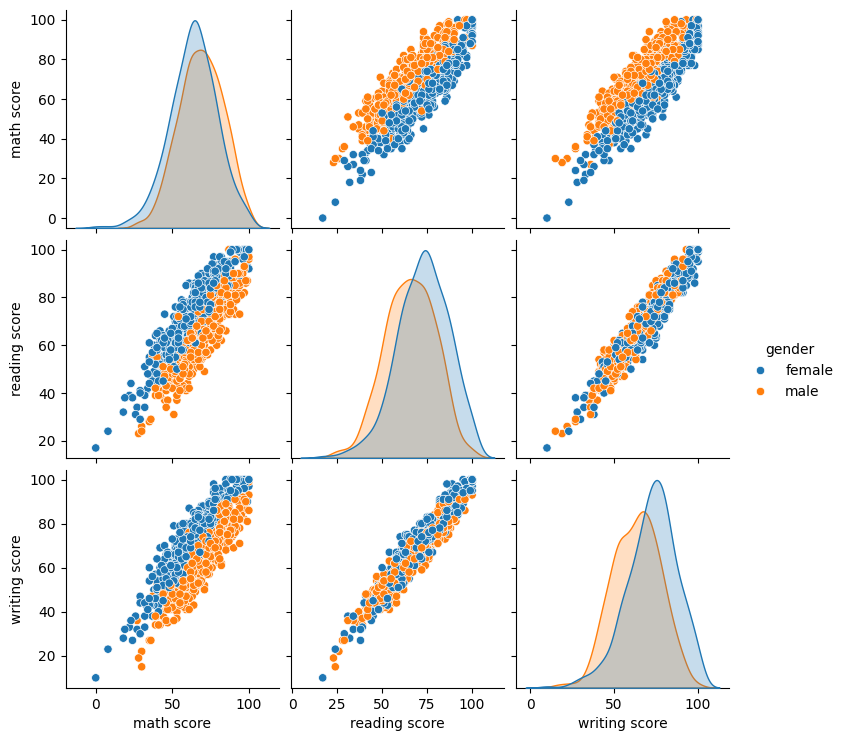

In [8]:
sea.pairplot( data ,hue='gender')
plt.show()

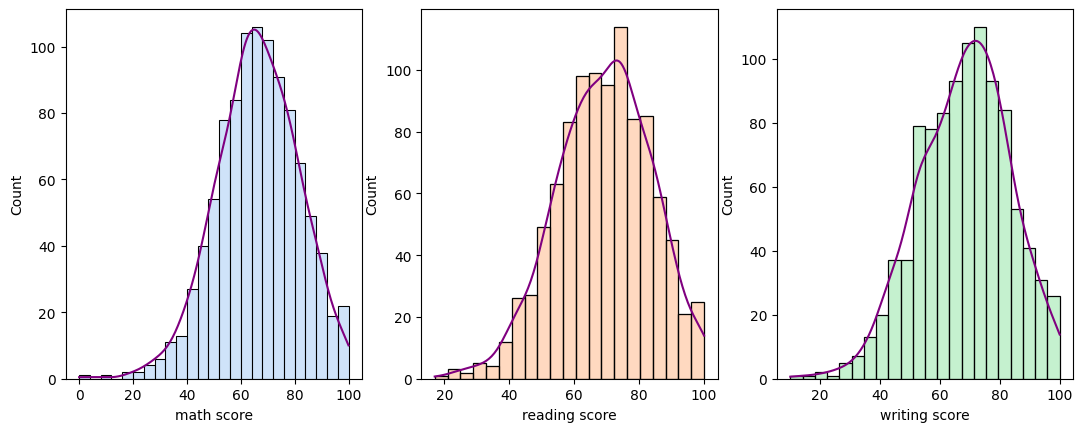

In [9]:
palette  = sea.color_palette('pastel',n_colors=3)
fig , ax = plt.subplots(1,3)
fig.set_figwidth(13)
for index,coluna in enumerate(['math score','reading score','writing score']):
    sea.histplot(data[coluna],ax=ax[index],color=palette[index],kde=True)
    ax[index].lines[0].set_color('purple')
plt.show()

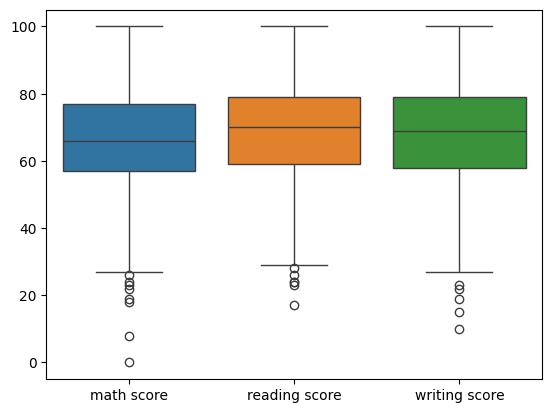

In [10]:
sea.boxplot(data[['math score','reading score','writing score']])
plt.show()

> Há outliers, contudo a remoção dos mesmo prioram os resultados para a classificação do genero

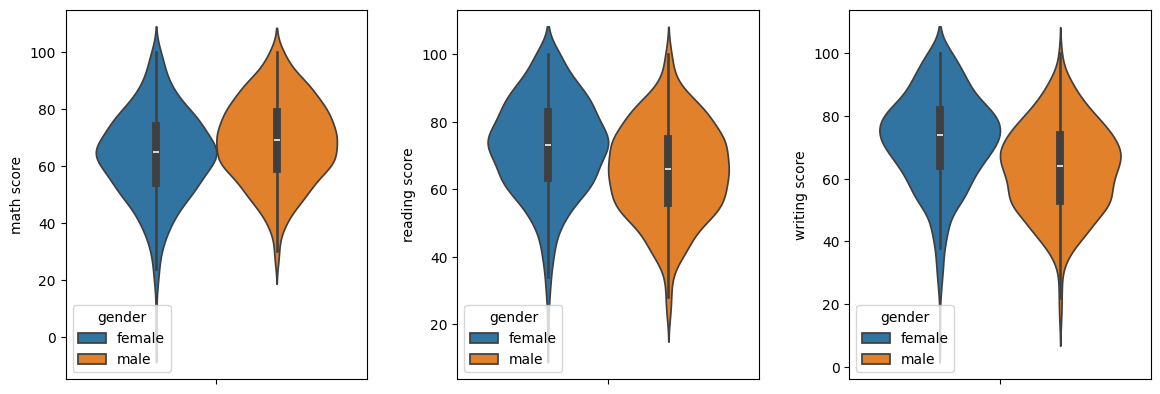

In [11]:
fig , ax = plt.subplots(1,3)
fig.set_figwidth(14)
fig.subplots_adjust(wspace=0.3)
for index,coluna in enumerate(['math score','reading score','writing score']):
    sea.violinplot(y = data[coluna],hue=data['gender'],ax=ax[index])
plt.show()

In [12]:
pizza  = data.groupby(by=['race/ethnicity'])['parental level of education'].value_counts().reset_index()

In [13]:
pizza.loc[pizza['race/ethnicity'] =='group A'].sort_values(by='parental level of education')

,race/ethnicity,parental level of education,count
3,group A,associate's degree,14
4,group A,bachelor's degree,12
2,group A,high school,18
5,group A,master's degree,3
1,group A,some college,18
0,group A,some high school,24


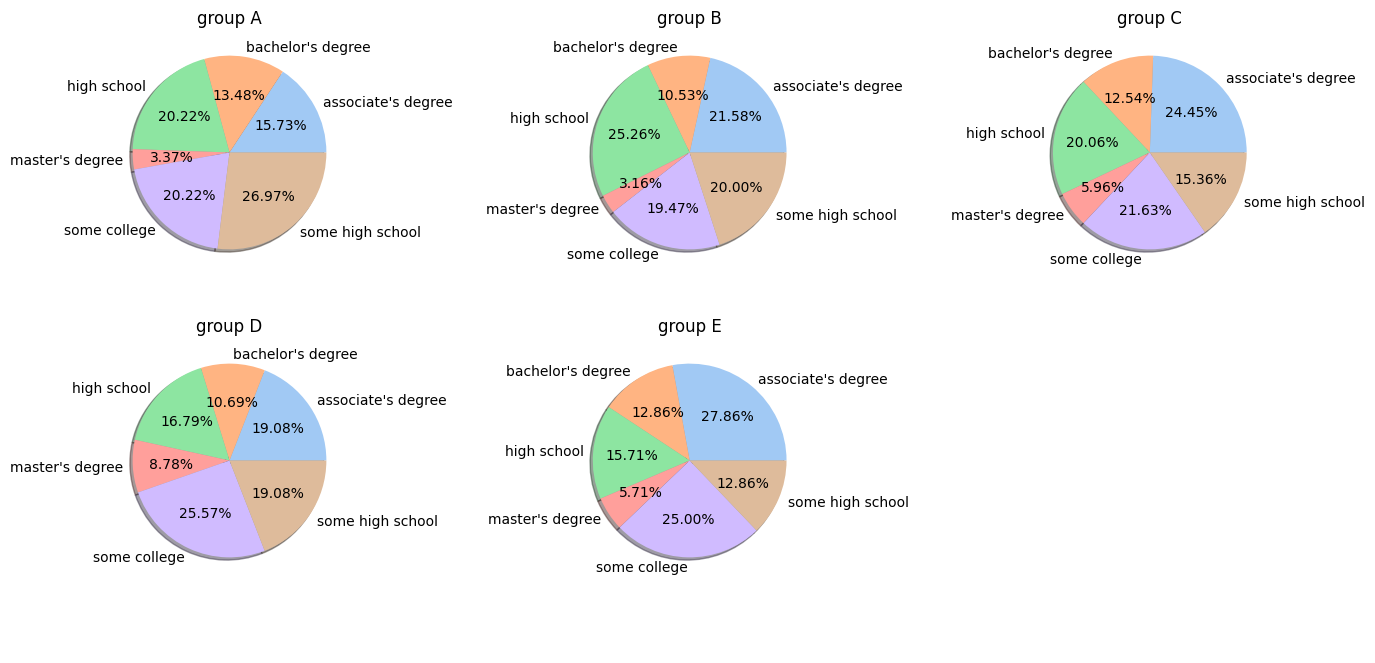

In [14]:
fig , ax = plt.subplots(2,3,figsize=(15, 9))
fig.subplots_adjust(wspace=0.9,hspace=-0.2)

etinias  = pizza['race/ethnicity'].unique()
index    = 0
for i in range(2):
    for j in range(3):
        if (index == len(etinias)): break
        selecao = pizza.loc[pizza['race/ethnicity'] == etinias[index]].sort_values(by='parental level of education')
        ax[i,j].pie(x = selecao['count'] , labels = selecao['parental level of education'],autopct=lambda x:'{:.2f}%'.format(x),colors=sea.color_palette('pastel',n_colors=7),shadow=True)
        ax[i,j].set_title(etinias[index])
        index+=1
ax[1,2].axis('off')
plt.show()

In [15]:
bars = data.groupby(by=['gender','race/ethnicity'])[['math score','reading score','writing score']].mean().reset_index()
bars = bars.round(2)
bars

,gender,race/ethnicity,math score,reading score,writing score
0,female,group A,58.53,69.00,67.86
1,female,group B,61.40,71.08,70.05
2,female,group C,62.03,71.94,71.78
3,female,group D,65.25,74.05,75.02
4,female,group E,70.81,75.84,75.54
5,male,group A,63.74,61.74,59.15
6,male,group B,65.93,62.85,60.22
7,male,group C,67.61,65.42,62.71
8,male,group D,69.41,66.14,65.41
9,male,group E,76.75,70.30,67.39


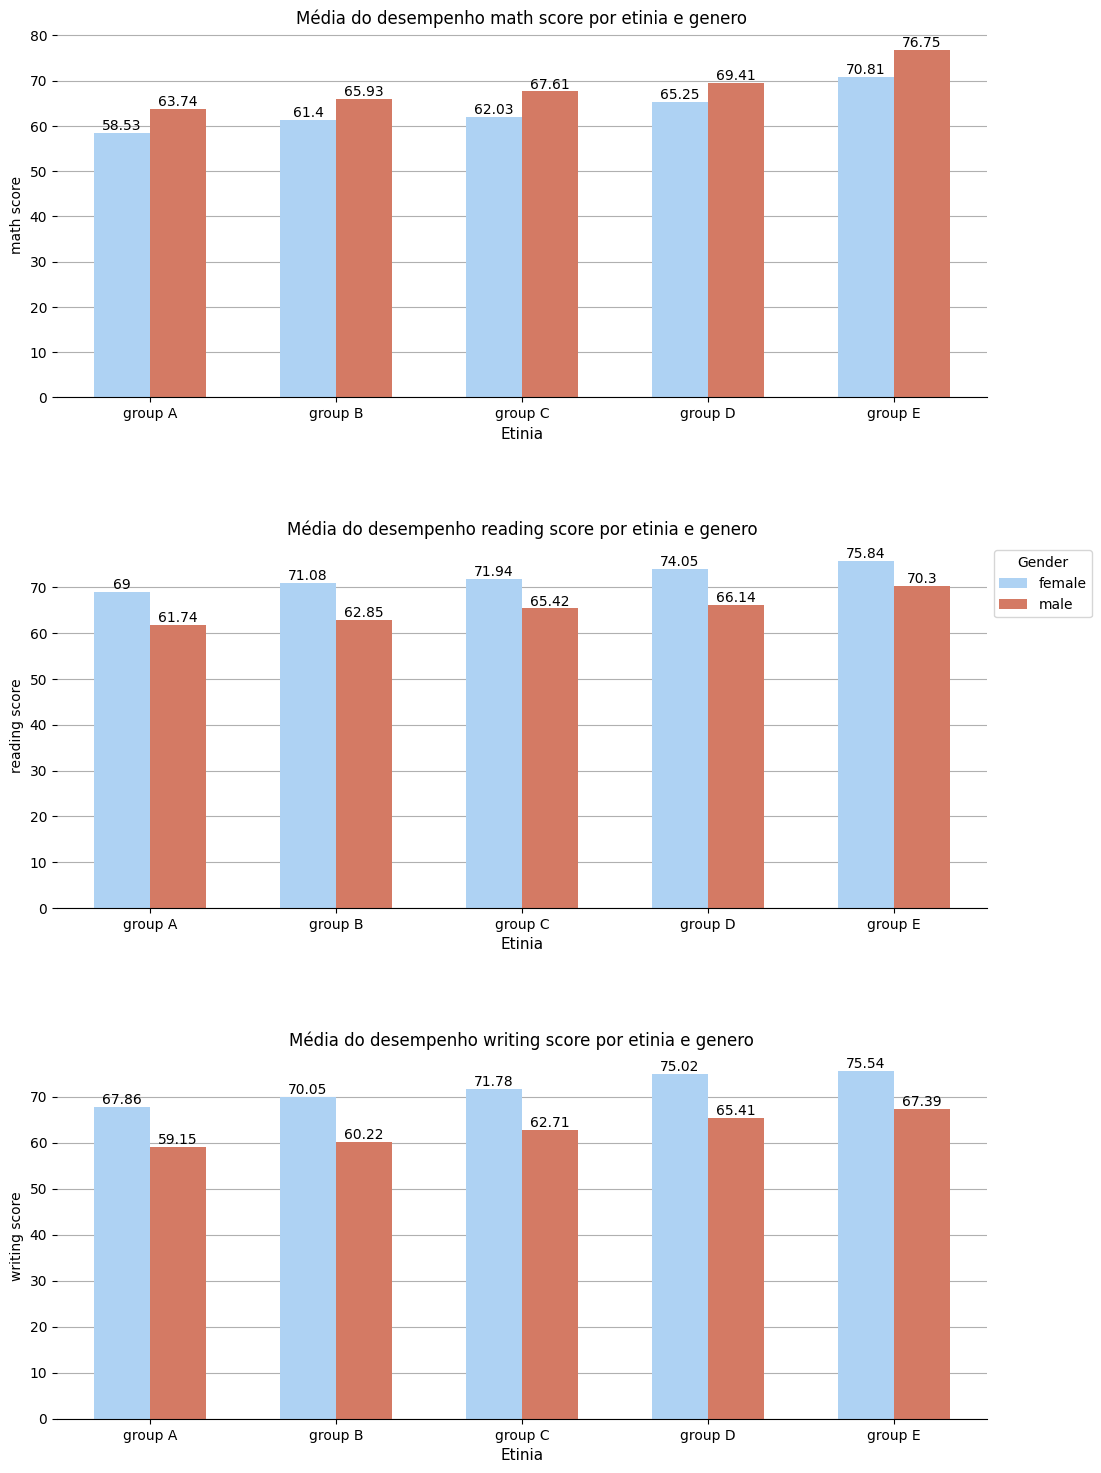

In [16]:
fig , ax = plt.subplots(3,1,figsize=(12,18))
fig.subplots_adjust(hspace=0.4)
for i,value in enumerate(['math score','reading score','writing score']):
   
    color = ['#a2d2ff','#e76f51']
    bar = sea.barplot(x = bars['race/ethnicity'],y = bars[value], hue=bars['gender'], ax=ax[i] ,width=0.6 ,palette=color)
    bar.bar_label(bar.containers[0], fontsize=10)
    bar.bar_label(bar.containers[1], fontsize=10)

    ax[i].set_axisbelow(True)
    ax[i].grid(axis='y')
    ax[i].spines[['left','right','top']].set_visible(False)
    ax[i].set_title(f'Média do desempenho {value} por etinia e genero')
    ax[i].legend().set_visible(False)
    ax[i].set_xlabel('Etinia',size=11)
    ax[i].set
ax[1].legend(bbox_to_anchor=(1,1,0,0)).set_title('Gender')

plt.show()

&nbsp;

&nbsp;

# Pré processamentos

In [17]:
from sklearn.preprocessing   import MinMaxScaler,StandardScaler,LabelBinarizer

In [18]:
dataset = pd.read_csv(r'dataset/StudentsPerformance.csv',sep=',')

transformação de atributos

In [19]:
ClassGender = LabelBinarizer()
ClassLunch  = LabelBinarizer()
ClassTest   = LabelBinarizer()

dataset['gender'] = ClassGender.fit_transform(data['gender'])
dataset['lunch']  = ClassLunch.fit_transform(data['lunch'])
dataset['test preparation course'] = ClassTest.fit_transform(data['test preparation course'])

get dummies para atributos categoricos

In [20]:
dataset = pd.get_dummies(dataset,columns=['race/ethnicity','parental level of education'],dtype=int)

Normalização dos atributos

In [21]:
dataset[['math score','reading score','writing score']] = StandardScaler().fit_transform(dataset[['math score','reading score','writing score']])

In [22]:
dataset.head(3)

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,0.390024,0.193999,0.391492,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0.192076,1.427476,1.313269,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,1.577711,1.770109,1.642475,0,1,0,0,0,0,0,0,1,0,0


&nbsp;

## Classificando Gênero

In [60]:
from sklearn.metrics         import *
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier

In [24]:
from imblearn.under_sampling import RandomUnderSampler

Definindo atributo alvo

In [25]:
X = dataset.drop(columns='gender')
Y = dataset['gender']
Y.value_counts()

gender
0    518
1    482
Name: count, dtype: int64

balanceando dados

In [46]:
under = RandomUnderSampler(sampling_strategy = {0:482,1:482} , random_state=42)

xunder, yunder = under.fit_resample(X,Y)

definindo modelo

In [47]:
xtrain , xtest , ytrain , ytest = train_test_split(xunder.values,yunder.values,test_size=0.3,random_state=42)

&nbsp;

#### KNN

In [48]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [49]:
predknn = knn.predict(xtest)

In [50]:
ClassGender.classes_.tolist()

['female', 'male']

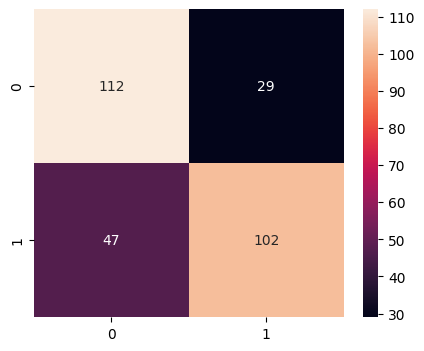

In [51]:
plt.figure(figsize=(5,4))
sea.heatmap(confusion_matrix(ytest,predknn),annot=True,fmt='')
plt.show()

In [52]:
print(classification_report(ytest,predknn))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75       141
           1       0.78      0.68      0.73       149

    accuracy                           0.74       290
   macro avg       0.74      0.74      0.74       290
weighted avg       0.74      0.74      0.74       290



&nbsp;

#### Logistic Regression

In [53]:
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings('ignore',category=FitFailedWarning)
warnings.filterwarnings('ignore',category=UserWarning)

In [54]:
params = dict(
    penalty= ['l1', 'elasticnet'] ,
    C      = [1,2,3],
    solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    max_iter = [1000],

)
gridlogistic =  GridSearchCV(
    estimator  = LogisticRegression(),
    param_grid = params
) 
gridlogistic.fit(xunder.values,yunder.values)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3], 'max_iter': [1000],
                         'penalty': ['l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [55]:
print(gridlogistic.best_estimator_)
print(gridlogistic.best_score_)

LogisticRegression(C=2, max_iter=1000, penalty='l1', solver='liblinear')
0.8972905872193436


In [56]:
logistic = LogisticRegression(C=2, max_iter=1000, penalty='l1', solver='liblinear')
logistic.fit(xtrain,ytrain)

LogisticRegression(C=2, max_iter=1000, penalty='l1', solver='liblinear')

In [57]:
predlogistic = logistic.predict(xtest)

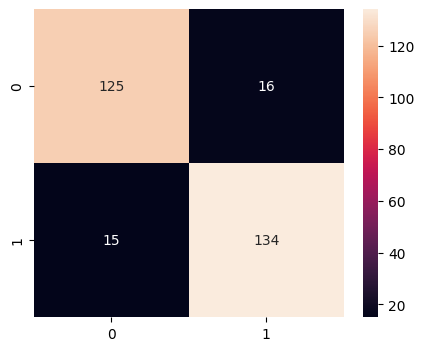

In [58]:
plt.figure(figsize=(5,4))
sea.heatmap(confusion_matrix(ytest,predlogistic),annot=True,fmt='')
plt.show()

In [59]:
print(classification_report(ytest,predknn))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75       141
           1       0.78      0.68      0.73       149

    accuracy                           0.74       290
   macro avg       0.74      0.74      0.74       290
weighted avg       0.74      0.74      0.74       290



&nbsp;

#### SVM

In [40]:
svm = SVC()
svm.fit(xtrain,ytrain)

SVC()

In [41]:
predsvm = svm.predict(xtest)

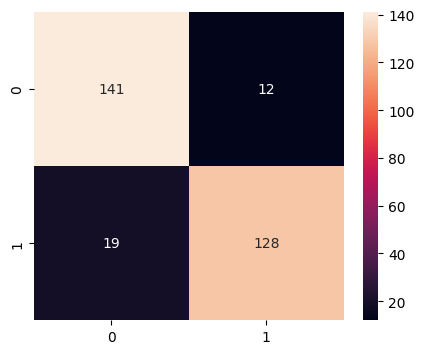

In [42]:
plt.figure(figsize=(5,4))
sea.heatmap(confusion_matrix(ytest,predsvm),annot=True,fmt='')
plt.show()

In [43]:
print(classification_report(ytest,predknn))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       153
           1       0.74      0.63      0.68       147

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.70       300
weighted avg       0.71      0.71      0.70       300



&nbsp;

#### Arvore de decisão

In [61]:
tree = DecisionTreeClassifier()
tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [62]:
predtree = tree.predict(xtest)

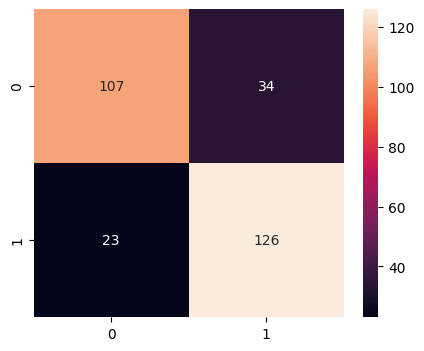

In [63]:
plt.figure(figsize=(5,4))
sea.heatmap(confusion_matrix(ytest,predtree),annot=True,fmt='')
plt.show()

## Previsão de notas

In [44]:
from sklearn.linear_model import LogisticRegression,LinearRegression